In [1]:
#import pip

In [2]:
# pip.main(["install", "openpyxl"])
#pip.main(["install","scikit-learn.linear_model"])

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#path = Path.cwd().joinpath("Raw_sensing_data","CO","Cu-COF-DC-8","N2_dry").rglob("*.xlsx")

#for i in path:
#    print(i)

In [10]:
def read_data(cof, gas, carrier, ppm):

    # get path to appropriate file
    path = Path.cwd().joinpath("Raw_sensing_data",gas,cof,carrier,).rglob("*.xlsx")
    #print(path)
    # some folders contain multiple excel files, so append all to a list
    files = []
    for file in path:
        files.append(file)
    #print(files)
    # extract data from Excel files in list
    dfs = []
    for p in files:
        df = pd.read_excel(p,header=6,names=['time','GB1 DeltaG/G0','GB2 DeltaG/G0','GB3 DeltaG/G0','GB4 DeltaG/G0'],usecols="B,D,H,L,P",sheet_name=str(ppm) +' ppm')

        # exposure time begins at 750s
        # exposure time ends 2580s later (3330s)
        df_chopped = df.iloc[1499:6660]
        
        
        dfs.append(df_chopped)
        
        
    return dfs
# returns pandas data frame with this data. two columns: time, DeltaG/G0

In [11]:
#print(read_data("Cu-COF-DC-8","CO","N2_dry",80))

data = read_data("Cu-COF-DC-8","H2S","air_humid",80)

[WindowsPath('c:/github things/cof-sensor-array-v2/Raw_sensing_data/H2S/Cu-COF-DC-8/air_humid/GB_S_I_188_2_Cu-COF-DC-8_H2S_80ppm_humidair.xlsx')]


In [12]:
print(data)

[        time  GB1 DeltaG/G0  GB2 DeltaG/G0  GB3 DeltaG/G0  GB4 DeltaG/G0
1499   750.0       0.000000      -0.064974       0.140033       1.543782
1500   750.5       0.000000       0.000000       0.419539       0.849203
1501   751.0      -0.217382      -0.043201       0.489331       0.154502
1502   751.5       0.000000       0.237430       0.279730      -0.231444
1503   752.0      -0.217382       0.129602       0.140033       0.077066
...      ...            ...            ...            ...            ...
6655  3328.0      89.236542      99.015552      98.150651      99.165959
6656  3328.5      89.247393      99.019223      98.145059      99.169048
6657  3329.0      89.253904      99.017495      98.149947      99.167502
6658  3329.5      89.228954      99.022464      98.147151      99.163645
6659  3330.0      89.224613      99.023543      98.147151      99.162873

[5161 rows x 5 columns]]


In [17]:
# partition data into K sec windows in the first N sec 
# after substance introduction (750 sec)

K = 40
N = 400
n_partitions = int(N/K)

dfs = []
for i in range(n_partitions):
    dfs.append(data[0].iloc[i*K:(i+1)*K])

#print(dfs)
#print(dfs[1]['time'])

X = dfs[3].loc[:,"time"].to_numpy().reshape(-1,1)
Y = dfs[3].loc[:,"GB3 DeltaG/G0"].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X,Y)

Regression coefficients:  [[0.93672504]]
Mean squared error  0.095172265486779


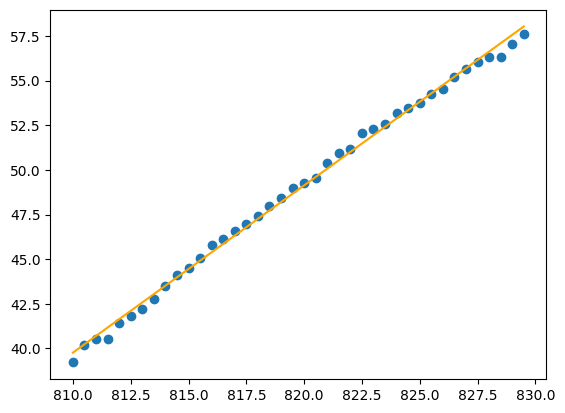

In [18]:
y_fit = reg.predict(X)


print("Regression coefficients: ",reg.coef_)
print("Mean squared error ", mean_squared_error(Y,y_fit))



plt.scatter(X,Y)
plt.plot(X,y_fit,color="orange")

plt.show()


In [19]:
# worse way to get initial slope
"""
print(data[0].loc[1497:4000])
axes = data[0].plot(x='time',y='DeltaG/G0',xlim=(749.5,900),ylim=(-100,100))


init_t = 1497
init_t_end = 1570
per = 10
slopes = data[0].diff(periods = per).loc[init_t:init_t_end,"DeltaG/G0"] / data[0].diff(periods = per).loc[init_t:init_t_end,"time"]
#slopes = data[0].diff().loc[1400:1600,"DeltaG/G0"] / 0.5

print(slopes)
maxslope = slopes.max()
maxloc = slopes.idxmax()
print(maxslope,maxloc)
print(data[0].loc[init_t,"time"],data[0].loc[init_t_end,"time"])

x = [data[0].loc[maxloc-per,"time"],data[0].loc[maxloc+40-per,"time"]]
y = [data[0].loc[maxloc-per,"DeltaG/G0"],(x[1]-x[0])*maxslope + data[0].loc[maxloc-per,"DeltaG/G0"]]

axes.plot(x,y,'orange')

axes2 = data[0].plot(x='time',y='DeltaG/G0',xlim=(749.5,829.5),ylim=(-25,25))
axes2.plot(x,y,'orange') """

'\nprint(data[0].loc[1497:4000])\naxes = data[0].plot(x=\'time\',y=\'DeltaG/G0\',xlim=(749.5,900),ylim=(-100,100))\n\n\ninit_t = 1497\ninit_t_end = 1570\nper = 10\nslopes = data[0].diff(periods = per).loc[init_t:init_t_end,"DeltaG/G0"] / data[0].diff(periods = per).loc[init_t:init_t_end,"time"]\n#slopes = data[0].diff().loc[1400:1600,"DeltaG/G0"] / 0.5\n\nprint(slopes)\nmaxslope = slopes.max()\nmaxloc = slopes.idxmax()\nprint(maxslope,maxloc)\nprint(data[0].loc[init_t,"time"],data[0].loc[init_t_end,"time"])\n\nx = [data[0].loc[maxloc-per,"time"],data[0].loc[maxloc+40-per,"time"]]\ny = [data[0].loc[maxloc-per,"DeltaG/G0"],(x[1]-x[0])*maxslope + data[0].loc[maxloc-per,"DeltaG/G0"]]\n\naxes.plot(x,y,\'orange\')\n\naxes2 = data[0].plot(x=\'time\',y=\'DeltaG/G0\',xlim=(749.5,829.5),ylim=(-25,25))\naxes2.plot(x,y,\'orange\') '

In [10]:
# function to do linear regression on a single partition of data
    # input: partition of time & each DeltaG/G0 
    # output: linear regression coefficients and mean squared errors
def lin_reg(df):
    X = df.loc[:,"time"].to_numpy().reshape(-1,1)
    Ys = []
    y_fits = []
    coefs = []
    mses = []
    for j in range(1,4):
        Y = df.loc[:,str(j)+" DeltaG/G0"].to_numpy().reshape(-1,1)
        Ys.append(Y)
        reg = LinearRegression().fit(X,Y)
        y_fit = reg.predict(X)
        mses.append(mean_squared_error(Y,y_fit))
        y_fits.append(y_fit)
        coef = reg.coef_.tolist().pop().pop()
        coefs.append(coef)
        print("coef from lin_reg function: ",coef)

    return [coefs,mses,X,Y,y_fit]

In [19]:
class SensorResponse:
    def __init__(self, cof, gas, carrier_gas, ppm):
        self.cof = cof
        self.gas = gas
        self.carrier_gas = carrier_gas
        self.ppm = ppm

        self.data = read_data(cof,gas,carrier_gas,ppm)
        
     # read in the data, do processing to get the features.
     # store data here too for viz

    # Define function to estimate initial slope of data
    # partition_size := size of the time window for partitions (ex: 30sec)
    # total_time_window := the total time after introduction of substance (750s)
    # considered to compute intial slope (ex: 300s)
    # j := which element of the self.data, default j=0
    def compute_initial_slope(self, partition_size, total_time_window,j=0):
        
        n_partitions = int(total_time_window/partition_size)
        slopes_mse = []
        partitions = []
        #partition the data
        for i in range(n_partitions):
            partitions.append(self.data[0].iloc[i*partition_size:(i+1)*partition_size])
        
        # perform linear regression on partitions and append (coefficient, MSE) pairs
        # to slopes_mse
        for df in partitions:
            regdata = lin_reg(df)
            
        for j in range(4):
            # condition on mean squared error: only include data if MSE is small enough
            if regdata[1] < 0.5:
                slopes_mse.append(regdata)

        # take initial slope to be the max of the linear regression slopes which
        # satisfy the MSE condition
        #print(slopes_mse)
        slope_msedf = pd.DataFrame(slopes_mse)
        print(slope_msedf)
        initial_slopeloc = slope_msedf[0].idxmax()
        initial_slope = slope_msedf[0].max()

        
        axes = self.data[0].plot(x='time',y='DeltaG/G0',xlim=(749.5,2000),ylim=(-10,10))        
         
        fig, ax = plt.subplots()
        
        scatter = ax.scatter(slope_msedf[2].iloc[initial_slopeloc],slope_msedf[3].iloc[initial_slopeloc])
        
        ax.plot(slope_msedf[2].iloc[initial_slopeloc],slope_msedf[4].iloc[initial_slopeloc],color="orange")


        return initial_slope

        
'''
    def compute_initial_slope(self, nb_pts):
        initial_slopes = []
        init_t = 1497
        init_t_end = 1570
        per = 10
        for df in data:
            # initialize slopes of change in DeltaG/G0 / change in time
            # restrict to time locations between 749 seconds and 800.5 seconds
            slopes = data[0].diff(periods = per).loc[init_t:init_t_end,"DeltaG/G0"] / data[0].diff(periods = per).loc[init_t:init_t_end,"time"]

            # find maximum slope 
            maxslope = slopes.max()
            maxloc = slopes.idxmax()

            # add initial slope to list of initial slopes
            initial_slopes.append(maxslope)

        return initial_slopes '''
   #def compute_saturation(self):
   #def compute_area(self):
   #def viz(self, save=False): # viz the data along with the response features or function u fit to it.
   #def vector_representation(self): # returns the vector characterizing the response.

'\n    def compute_initial_slope(self, nb_pts):\n        initial_slopes = []\n        init_t = 1497\n        init_t_end = 1570\n        per = 10\n        for df in data:\n            # initialize slopes of change in DeltaG/G0 / change in time\n            # restrict to time locations between 749 seconds and 800.5 seconds\n            slopes = data[0].diff(periods = per).loc[init_t:init_t_end,"DeltaG/G0"] / data[0].diff(periods = per).loc[init_t:init_t_end,"time"]\n\n            # find maximum slope \n            maxslope = slopes.max()\n            maxloc = slopes.idxmax()\n\n            # add initial slope to list of initial slopes\n            initial_slopes.append(maxslope)\n\n        return initial_slopes '

In [20]:
# Test the SensorResponse class initial_slope function
test = SensorResponse("Cu-COF-DC-8","CO","air_dry",80)


[WindowsPath('c:/github things/cof-sensor-array-v2/Raw_sensing_data/CO/Cu-COF-DC-8/air_dry/GB_S_II_1_Cu-COF-DC-8_CO_80ppm_dryair.xlsx')]


coef from lin_reg function:  -0.04722079716958287
coef from lin_reg function:  0.017068353572165004
coef from lin_reg function:  0.10734166004413993
coef from lin_reg function:  0.04921730623783601
coef from lin_reg function:  -0.04993350995966946
coef from lin_reg function:  0.026537260736176738
coef from lin_reg function:  0.00011395201576706944
coef from lin_reg function:  0.0617817081661972
coef from lin_reg function:  -0.011603817040921258
coef from lin_reg function:  -0.02301428576776895
          0         1                                                  2  \
0  0.000114  0.493956  [[869.0], [869.5], [870.0], [870.5], [871.0], ...   
1  0.061782  0.383614  [[889.0], [889.5], [890.0], [890.5], [891.0], ...   
2 -0.011604  0.207858  [[909.0], [909.5], [910.0], [910.5], [911.0], ...   
3 -0.023014  0.496121  [[929.0], [929.5], [930.0], [930.5], [931.0], ...   

                                                   3  \
0  [[0.0], [0.5929483531741444], [-0.592948353174...   
1  [[0.8

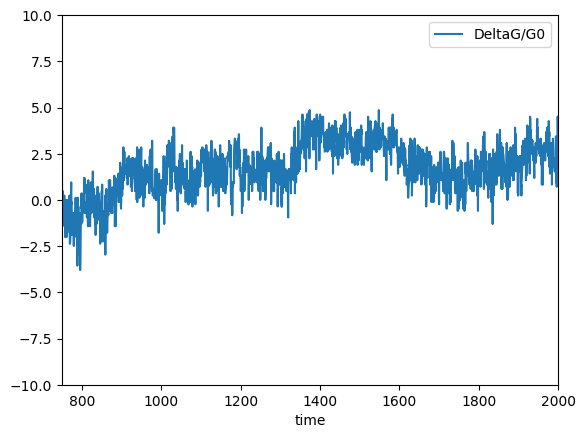

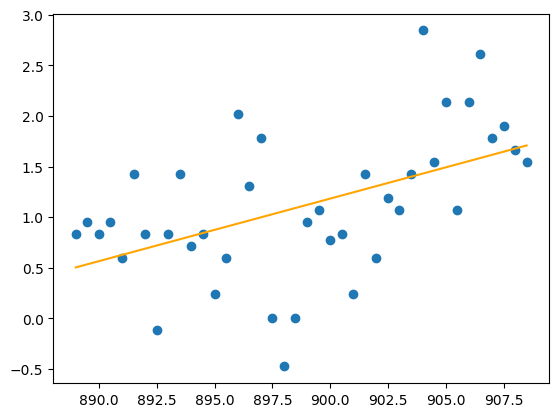

In [21]:

print(test.compute_initial_slope(40,400))

In [14]:
test2 = SensorResponse("Cu-COF-DC-8","NH3","air_humid",80)

[WindowsPath('c:/github things/cof-sensor-array-v2/Raw_sensing_data/NH3/Cu-COF-DC-8/air_humid/GB_S_II_3_2_Cu-COF-DC-8_NH3_80ppm_humidair.xlsx')]


coef from lin_reg function:  0.014368571558335708
coef from lin_reg function:  0.4706970121721616
coef from lin_reg function:  0.5572414545939768
coef from lin_reg function:  0.3822549188465472
coef from lin_reg function:  0.20391092017616974
coef from lin_reg function:  0.140825677846275
coef from lin_reg function:  0.07737129366792303
coef from lin_reg function:  0.09883943164219211
coef from lin_reg function:  0.054184996741131655
coef from lin_reg function:  0.06308524232989471
          0         1                                                  2  \
0  0.014369  0.033590  [[749.0], [749.5], [750.0], [750.5], [751.0], ...   
1  0.557241  0.046939  [[789.0], [789.5], [790.0], [790.5], [791.0], ...   
2  0.382255  0.062802  [[809.0], [809.5], [810.0], [810.5], [811.0], ...   
3  0.203911  0.058521  [[829.0], [829.5], [830.0], [830.5], [831.0], ...   
4  0.140826  0.086085  [[849.0], [849.5], [850.0], [850.5], [851.0], ...   
5  0.077371  0.077736  [[869.0], [869.5], [870.0], [870.5

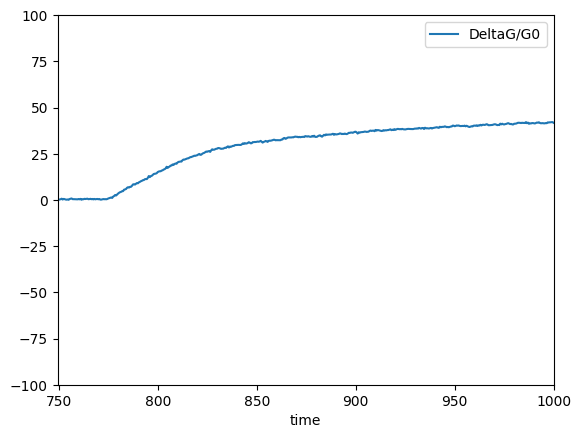

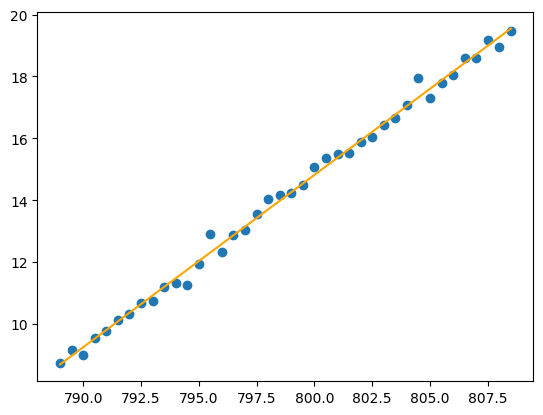

In [15]:

print(test2.compute_initial_slope(40,400))

# issue, getting same initial slope for NH3 and H2S